## INF367A Project: Spaceship Titanic

This project is part of an assignement for INF367A at UiB.
The project is taken from the Kaggle machine learning competition: Spaceship Titanic, which can be found here: https://www.kaggle.com/competitions/spaceship-titanic/

Contributors are:
- Stian Forren
- Johannes Lysne
- Elias Ruud Aronsen

Teacher: Nello Blaser    
TA: Willem Schooltink

# Data Exploration
- Downloaded from https://www.kaggle.com/competitions/spaceship-titanic/data

#### Description

- Around 13000 datapoints in total, split into ~8700 training and ~4300.
- 13 original features including PassengerId. Descriptions from Kaggle.
    - **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    - **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
    - **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    - **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    - **Destination** - The planet the passenger will be debarking to.
    - **Age** - The age of the passenger.
    - **VIP** - Whether the passenger has paid for special VIP service during the voyage.
    - **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    - **Name** - The first and last names of the passenger.


- And the prediction target:
    - **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [2]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('data/train.csv', sep=',')
test = pd.read_csv("data/test.csv")
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

### Conclusion
- We see that we need to change alot of the features into a numeric data type.
- There are alot of missing values we will need to be creative in imputing those values.
- There is room for feature engineering, like for example extracting the group number from **PassengerId** and splitting up **Cabin** into three distinct features.

## Feature Engineering

##### Splitting **PassengerId** into **Group** and **G_Id**

In [7]:
train[['Group', 'G_Id']] = train['PassengerId'].str.split('_', expand=True).copy().astype(int) # splits up passenger id into group and group number
train.drop(['PassengerId'], axis=1, inplace=True) # drops passenger id

## Further Exploratory Data Analysis

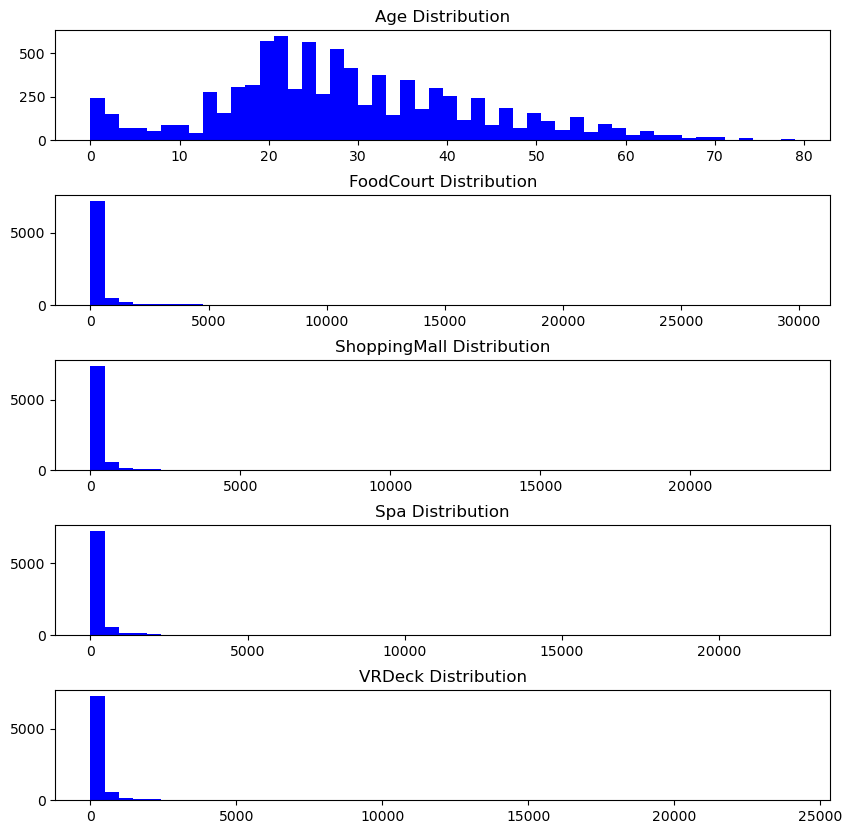

In [14]:
fig, ax = plt.subplots(5, 1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)  # adjust vertical spacing as needed

# Looking at the numerical distribution
ax[0].hist(train['Age'].dropna(), bins=50, color='b')
ax[0].set_title('Age Distribution')

ax[1].hist(train['FoodCourt'].dropna(), bins=50, color='b')
ax[1].set_title('FoodCourt Distribution')

ax[2].hist(train['ShoppingMall'].dropna(), bins=50, color='b')
ax[2].set_title('ShoppingMall Distribution')

ax[3].hist(train['Spa'].dropna(), bins=50, color='b')
ax[3].set_title('Spa Distribution')

ax[4].hist(train['VRDeck'].dropna(), bins=50, color='b')
ax[4].set_title('VRDeck Distribution')


plt.show()

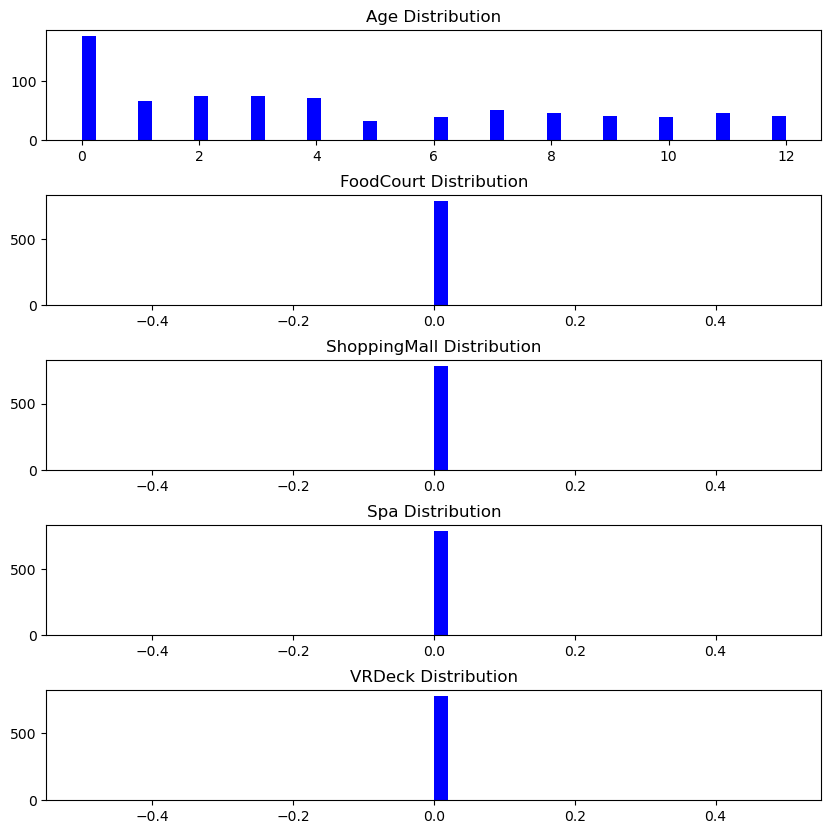

In [15]:
fig, ax = plt.subplots(5, 1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)  # adjust vertical spacing as needed

# Looking at the numerical distribution
ax[0].hist(train['Age'][train['Age'] < 13].dropna(), bins=50, color='b')
ax[0].set_title('Age Distribution')

ax[1].hist(train['FoodCourt'][train['Age'] < 13].dropna(), bins=50, color='b')
ax[1].set_title('FoodCourt Distribution')

ax[2].hist(train['ShoppingMall'][train['Age'] < 13].dropna(), bins=50, color='b')
ax[2].set_title('ShoppingMall Distribution')

ax[3].hist(train['Spa'][train['Age'] < 13].dropna(), bins=50, color='b')
ax[3].set_title('Spa Distribution')

ax[4].hist(train['VRDeck'][train['Age'] < 13].dropna(), bins=50, color='b')
ax[4].set_title('VRDeck Distribution')


plt.show()

##### Conclusion
- This data might be heavily skewed by extreme outliers. The vast majority is spending very little if not nothing on these services.
- We also see that kids 12 and under don't spend any money at all.